<a href="https://colab.research.google.com/github/yaraamrsalah/Machine-learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Selected-Project/log2.csv'
dataset = pd.read_csv(dataset_path)

In [4]:
dataset = pd.read_csv(dataset_path)


# Converting target values to numbers
Action = {'drop':0, 'allow': 1,'deny':2, 'reset-both':3}
dataset.Action = [Action[item] for item in dataset.Action]
target = dataset.Action

In [5]:
# Removing spaces from dataset column headers
dataset.columns = dataset.columns.str.replace(' ', '')

In [6]:
feature_columns = ['SourcePort', 'DestinationPort', 'NATSourcePort', 'NATDestinationPort', 'Bytes', 'BytesSent', 'BytesReceived', 'Packets', 'ElapsedTime(sec)', 'pkts_sent', 'pkts_received']
features = dataset[feature_columns]

In [7]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=1)

In [15]:
from sklearn.svm import SVC

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [16]:
y_predict = svc_model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

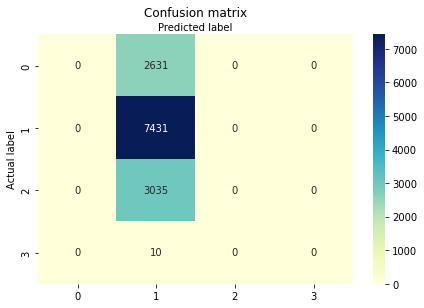

In [24]:
# Creating and visualizing the confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.57      1.00      0.72      7431
           2       0.00      0.00      0.00      3035
           3       0.00      0.00      0.00        10

    accuracy                           0.57     13107
   macro avg       0.14      0.25      0.18     13107
weighted avg       0.32      0.57      0.41     13107



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
